# <center> Решение уравнения теплопроводности методом расщипления</center>
 <center> **Курузов Илья, Кравченко Сергей**</center>

В данном проекте мы рассмотрим методы численного решения уравнения теплопроводности и задачи Коши для него.

Запишем уравнение:

$$\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2}$$

$$0 \leq t \leq T,\,(x,y) \in D$$

$$u(x,y,0) = f(x,y)$$

$$u|_D = 0$$

## 1. Описание методов

Возьмем в качестве системы:

$$\frac{\partial v}{\partial t} = \frac{\partial^2 v}{\partial x^2}$$

$$\frac{\partial w}{\partial t} = \frac{\partial^2 w}{\partial y^2}$$

$$v(x,y,t_p) = u(x,y,t_p), \,w(x,y,t_p) = v(x,y,t_{p+1})$$

Такую систему можно интерпретировать как приближенную замену процесса распространения тепла по плоскости Oxy за время $t_p \leq t \leq t_{p+1}$ на 2 процесса. В первом из них вводятся теплонепроницаемые перегородки, препятствующие распространению тепла по оси Oy. Затем, по прошествии времени $\tau$, взамен них вводятся перегородки мешающие распространению тепла вдоль оси Ox. Тогда распространение тепла описывается 2 уравнением.

Давайте возьмем сетку $(x_m, y_n, t_p) = (mh, nh, p\tau)$

Разностную схему можно построить большим числом способов, мы же рассмотрим ровно 2.

* Первый способ (явный)

 $$\frac{\widetilde{u}_{mn} - u_{mn}^p}{\tau} = \Lambda_{xx}u_{mn}^p$$

  $$\frac{u_{mn}^{p+1} - \widetilde{u}_{mn}}{\tau} = \Lambda_{yy}\widetilde{u}_{mn}^p$$

  $$u_{mn}^0 = f(x_m, y_n)$$
 
* Второй способ (неявный)

 $$\frac{\widetilde{u}_{mn} - u_{mn}^p}{\tau} = \Lambda_{xx}u_{mn}$$

  $$\frac{u_{mn}^{p+1} - \widetilde{u}_{mn}}{\tau} = \Lambda_{yy}{u_{mn}^{p+1}}$$

  $$u_{mn}^0 = f(x_m, y_n)$$

В обеих схемах положим: $\widetilde{u_{mn}} = v_{mn}^{p+1} = w_{mn}^{p}$,
$u_{mn}^{p+1} = w_{mn}^{p+1}$, также

$$\Lambda_{xx}u_{mn} = \frac{u_{m+1, n} - 2u_{mn} + u_{m-1, n}}{h^2}$$

$$\Lambda_{yy}u_{mn} = \frac{u_{m, n+1} - 2u_{mn} + u_{m, n-1}}{h^2}$$

## 2. Демонстрация работы

Продемонстрируем работу обоих метода. В качестве тестовых уравнений возьмем уравнения на квадрате $[-1, 1]^2$ при $a = 1$. Посмотрим на их работу при следующих начальных условиях: $f_1(x, y) = \exp(-(x+y)^2)$, $f_2(x,y) = 100$, $f_3(x,y) = $. Выведем результаты в моменты времени $T = 1, 0.5, 5\tau$ для $\tau = 0.004,\,h = 0.1$

In [6]:
from solver import solver
import numpy as np

dt = 0.004
h = 0.1
T = 1
size = 2
x, y = np.arange(-size / 2, size/2, h), np.arange(-size / 2, size/2, h)
x, y = np.meshgrid(x, y)
import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy
%matplotlib notebook

def show(res):
    M = int(len(res) / 10)

    fig = plt.figure(figsize=plt.figaspect(0.5))

    axes = fig.add_subplot(2, 2, 1, projection='3d')
    L = int(size / h / 2)
    plt.title("Moment T = 0")
    plt.grid()
    z = res[0]
    plt.xticks([])
    plt.yticks([])
    axes.plot_surface(x, y, z, rstride=4, cstride=4, cmap = cm.jet)

    axes = fig.add_subplot(2, 2, 2, projection='3d')
    plt.title(r"Moment T = 5$\tau$")
    plt.grid()
    z = res[5]
    axes.plot_surface(x, y, z, rstride=4, cstride=4, cmap = cm.jet)

    axes = fig.add_subplot(2, 2, 3, projection='3d')
    plt.title("Moment T = 0.5")
    plt.grid()
    z = res[5 * M]
    axes.plot_surface(x, y, z, rstride=4, cstride=4, cmap = cm.jet)

    axes = fig.add_subplot(2, 2, 4, projection='3d')
    plt.title("Moment T = 1")
    plt.grid()
    z = res[-1]
    axes.plot_surface(x, y, z, rstride=4, cstride=4, cmap = cm.jet)

### Явный метод

<IPython.core.display.Javascript object>


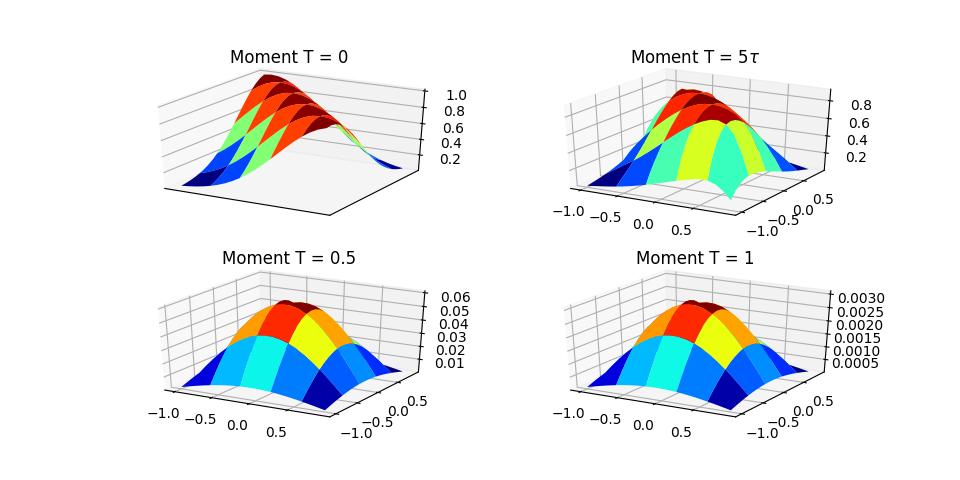

In [7]:
res = solver(1, lambda x, y: np.exp(-(x+y)**2), size).first(T, dt, h)
show(res)

<IPython.core.display.Javascript object>


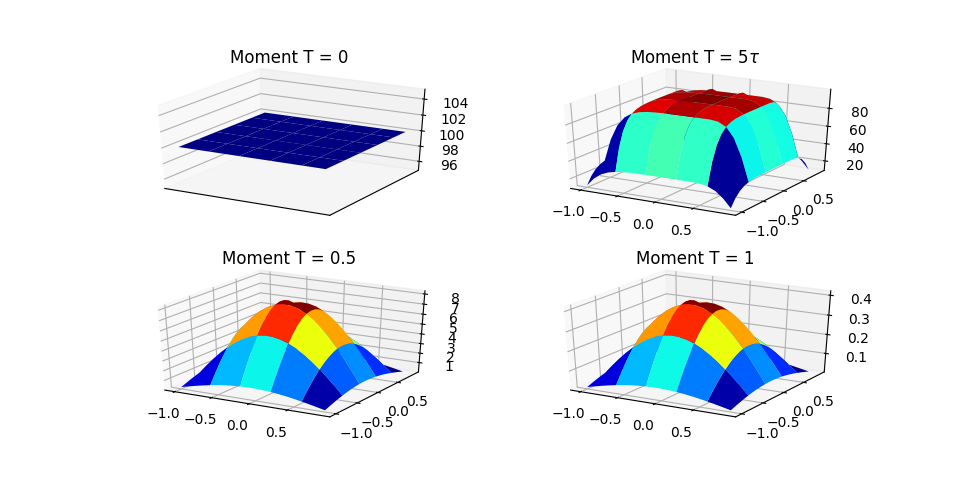

In [8]:
%matplotlib notebook
show(solver(1, lambda x, y: 100, size).first(T, dt, h))

### Неявный метод

<IPython.core.display.Javascript object>


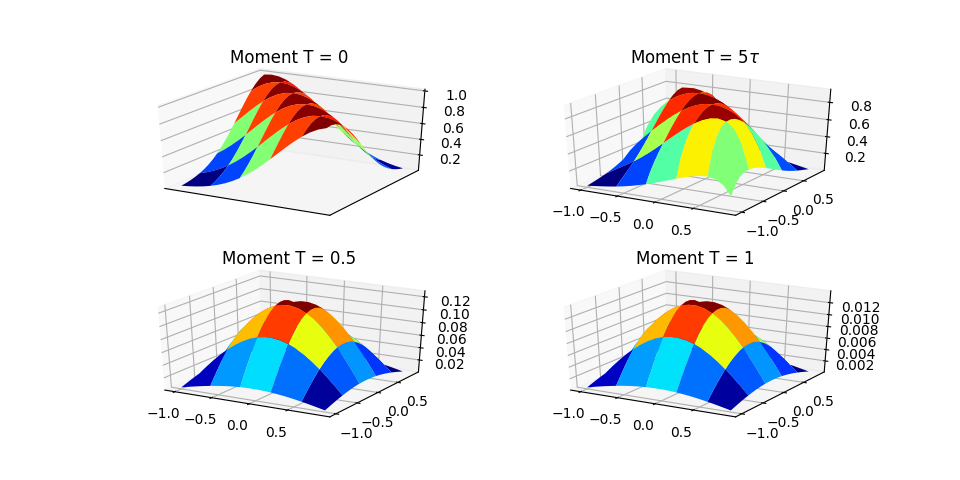

In [9]:
% matplotlib notebook
show(solver(1, lambda x, y: np.exp(-(x+y)**2), size).second(T, dt, h))


<IPython.core.display.Javascript object>


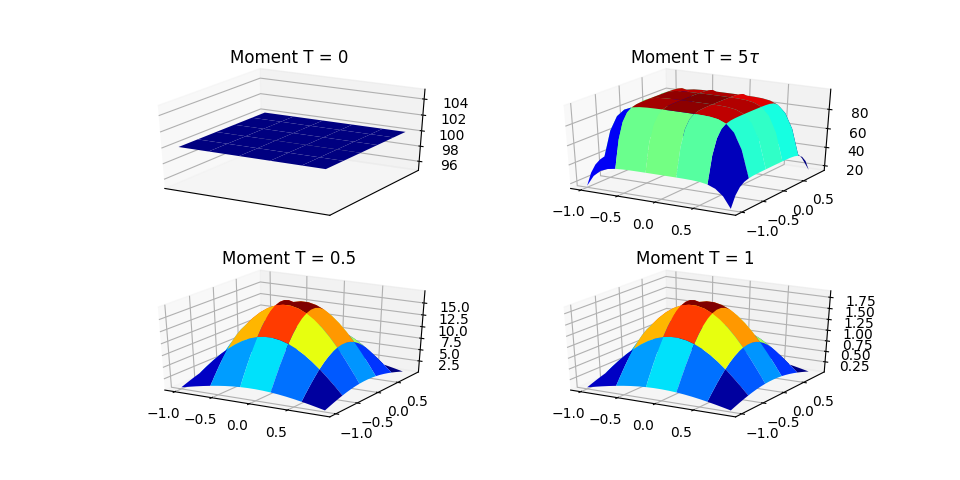

In [10]:
%matplotlib notebook
show(solver(1, lambda x, y: 100, size).second(T, dt, h))


## 3. Сравнение схем

### Скорость работы

Сравним методы по скорости работы для различных $h$ при $\tau = 0.4 h^2$ при тех же условиях, как и в предыдущем пункте для стартовой функции $f(x, y) = 100$.

In [4]:
import time
def show_1(h, f):
    res = []
    T = 1
    size = 2
    for i in h:
        dt = 0.4 * i**2
        m = time.time()
        f(T, dt, i)
        res.append(time.time()-m)
    return res
def show_first(h):
    f = lambda T, dt, i: solver(1, lambda x, y: 100, size).first(T, dt, i)
    return show_1(h, f)
def show_second(h):
    f = lambda T, dt, i: solver(1, lambda x, y: 100, size).first(T, dt, i)
    return show_1(h, f)
    
h = [0.05, 0.1, 0.5]
res_1 = show_first(h)
res_2 = show_second(h)
for ind, i in enumerate(h):
    print("h = %.2f\nFirst time = %.4fs\nSecond time = %.4fs"%(i, res_1[ind], res_2[ind]))

h = 0.05
First time = 1.2964s
Second time = 1.3335s
h = 0.10
First time = 0.1802s
Second time = 0.1621s
h = 0.50
First time = 0.0015s
Second time = 0.0014s


## 4. Выводы

Были рассмотрены явная и неявная схемы расщепления для одной разделенной непрерывной системы (см. п.3). Показана работоспособность обоих методов на тестовых уравнениях теплопроводности  в п.2. А так же были методы были сравнены по скорости работы. Оба метода, как и ожидалось, показывают приблизительно одинаковую скорость работы. К преимущуствам явного метода является относительная простота его реализации. Для неявного метода преимуществом является его сходимость вне зависимости от $r = \frac{tau}{h^2}$, в то время, как явный метод сходится только при $r < \frac{1}{2}$.